In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import torch, torchvision
import sklearn
import datetime


In [7]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples, noise = 0.03,
                    random_state = 42
              )

X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
y

In [10]:
# Make dataframe of features and labels
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


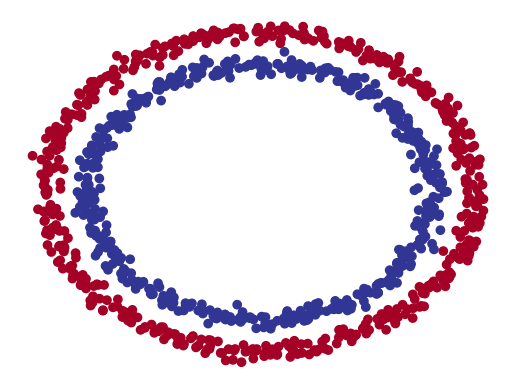

In [16]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.axis('off')
plt.show()

Input and output shapes

In [17]:
X.shape, y.shape

((1000, 2), (1000,))

In [20]:
len(X), len(y)

(1000, 1000)

Steps in modeling with tensorflow:

1. Create a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate again

In [ ]:

# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-3),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=100)

In [27]:
model_1.fit(X, y, epochs=1000, verbose=0) # set verbose=0 to remove training updates
model_1.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4890


[0.6931554675102234, 0.48899999260902405]

Creating new model

In [30]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_1 but with an extra layer)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1), # add an extra layer
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X, y, epochs=1000, verbose=0) # set verbose=0 to make the output print less


In [31]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.5000


[0.6947506666183472, 0.5]

Improving a model
To improve our model, we can alter almost every part of the 3 steps we went through before.

**Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer. <br>

**Compiling a model** - you might want to choose a different optimization function (such as the Adam optimizer, which is usually pretty good for many problems) or perhaps change the learning rate of the optimization function.  <br>

**Fitting a model** - perhaps you could fit a model for more epochs (leave it training for longer). <br>


In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  # Before TensorFlow 2.7.0
  # tf.keras.layers.Dense(100), # add 100 dense neurons

  # With TensorFlow 2.7.0
  # tf.keras.layers.Dense(100, input_shape=(None, 1)), # add 100 dense neurons

  ## After TensorFlow 2.8.0 ##
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=1) # fit for 100 passes of the data

In [33]:
model_3.evaluate(X,y )

32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6931715607643127, 0.5]

In [34]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


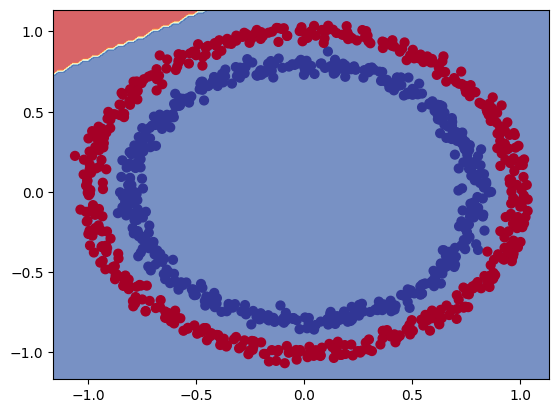

In [35]:
plot_decision_boundary(model_3, X, y)


In [37]:
model_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 100)               300       
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1321 (5.16 KB)
Trainable params: 1321 (5.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Trying our model into a regression problem

In [42]:


# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data
# Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

# After TensorFlow 2.7.0, see here for more: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/278
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_5' (type Sequential).
    
    Input 0 of layer "dense_7" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 1)
    
    Call arguments received by layer 'sequential_5' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=int64)
      • training=True
      • mask=None


In [47]:
# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(500),
  tf.keras.layers.Dense(200),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 246.7936 - mae: 246.7936
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 156.1254 - mae: 156.1254
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 162.5485 - mae: 162.5485
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 80.4377 - mae: 80.4377
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 103.7647 - mae: 103.7647
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 75.7185 - mae: 75.7185
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 78.5889 - mae: 78.5889
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 50.0110 - mae: 50.0110
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 46.6254 - mae: 46.6254
Epoch 10/100
5/5 [==============================] - 0s 6ms/step - loss: 53.5176 - mae: 53.5176
Epoch 11/100
5/5 [==============================] -

2/2 [==============================] - 0s 4ms/step


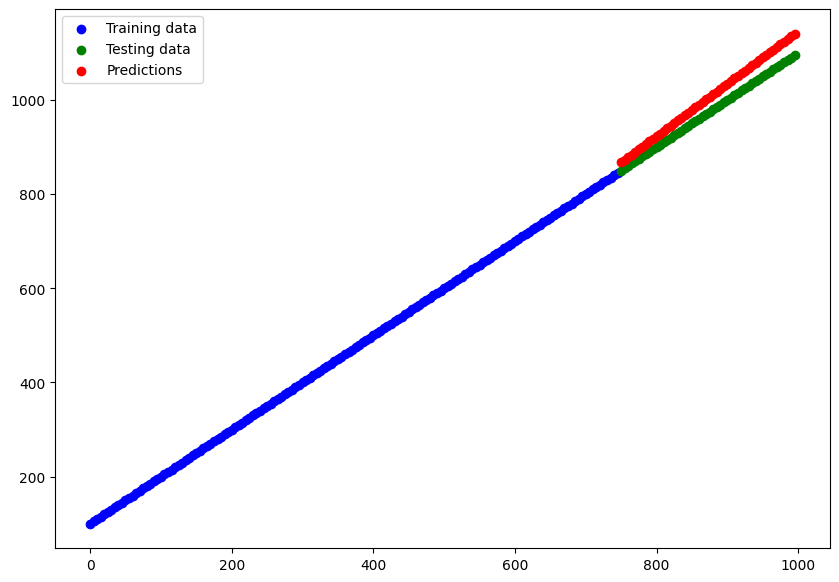

In [48]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();


Addressing non linearity

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation="relu"), # 1 hidden layer with linear activation
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # note: "lr" used to be what was used, now "learning_rate" is favoured
                metrics=["accuracy"])

# Fit the model
history = model_4.fit(X, y, epochs=100)

313/313 [==============================] - 0s 760us/step
doing binary classifcation...


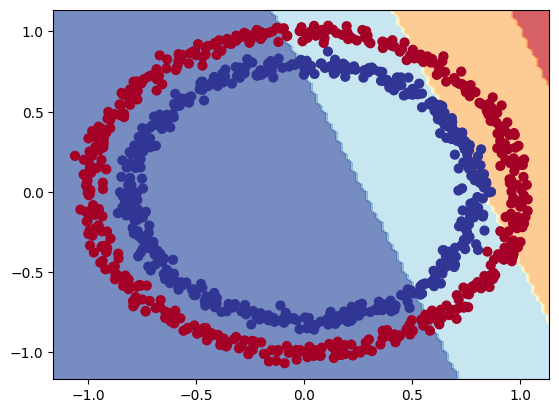

In [59]:
plot_decision_boundary(model_4, X, y)


In [62]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation

  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model_7.fit(X, y, epochs=100, verbose=0)


# Evaluate our model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 991us/step - loss: 0.0325 - accuracy: 0.9990


[0.03249378502368927, 0.9990000128746033]

313/313 [==============================] - 0s 793us/step
doing binary classifcation...


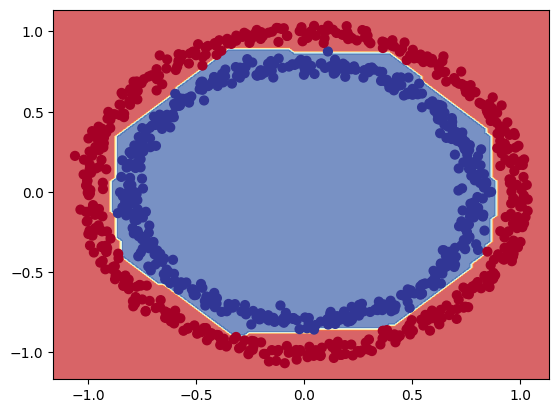

In [63]:
plot_decision_boundary(model_7, X, y)


Replicating non linear activation functions

In [64]:
A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

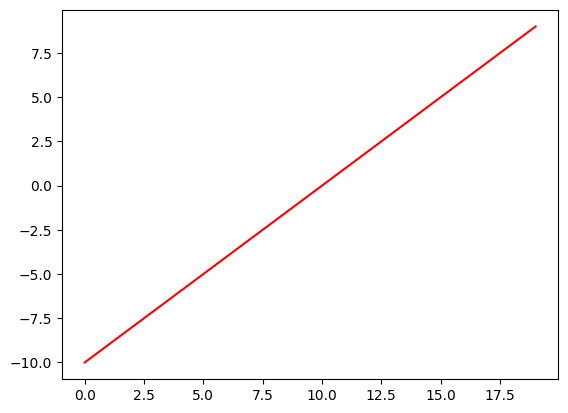

In [67]:
plt.plot(A, color = "red")

In [77]:
import numpy as np

def sigmoid(X):
    return 1 / (1 + np.exp(-X))


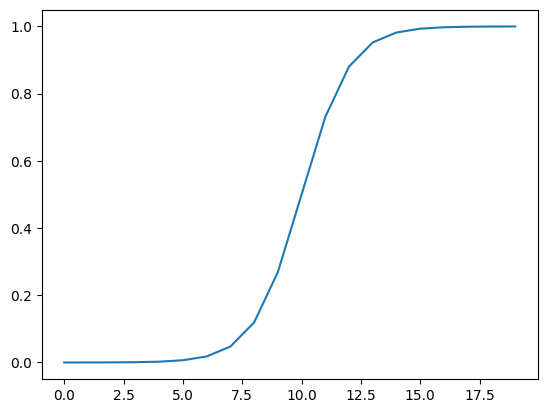

In [78]:
plt.plot(sigmoid(A))

In [84]:
def relu(X):

  return tf.maximum(0, X)

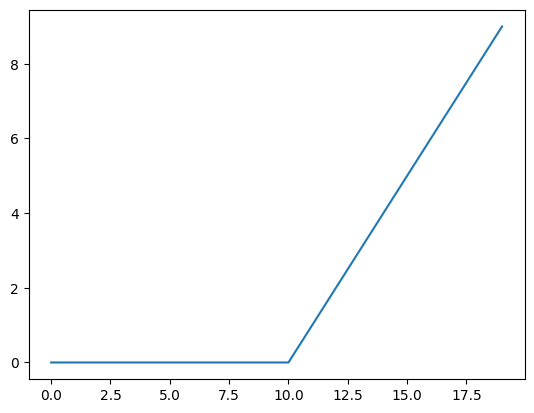

In [87]:
plt.plot(relu(A))

In [88]:
X_train, y_train = X[:800], y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set

# Check the shapes of the data
X_train.shape, X_test.shape

((800, 2), (200, 2))

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model (same as model_7)
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(8, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(8, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history = model_8.fit(X_train, y_train, epochs=100)

In [102]:
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.1122 - accuracy: 1.0000
Model loss on the test set: 0.11216439306735992
Model accuracy on the test set: 100.00%


313/313 [==============================] - 0s 805us/step
doing binary classifcation...
313/313 [==============================] - 0s 819us/step
doing binary classifcation...


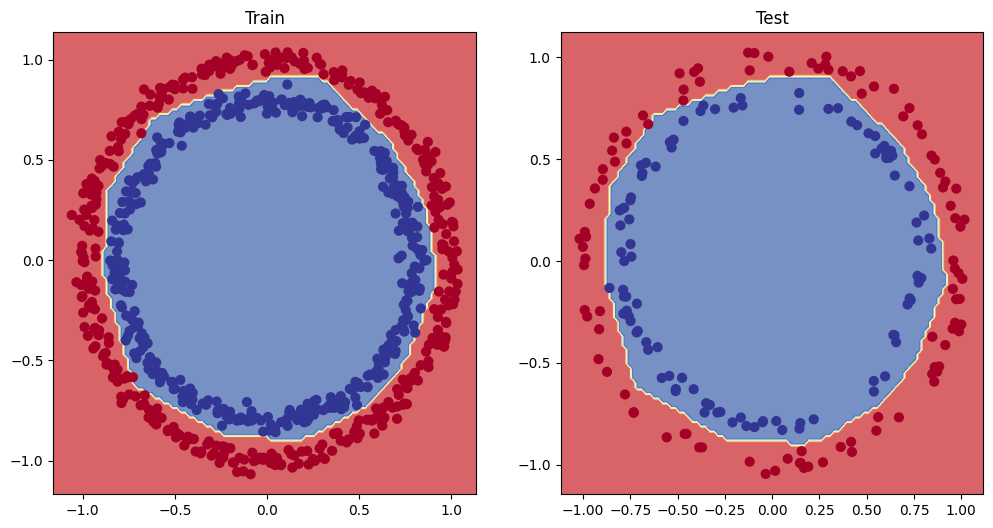

In [103]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

Text(0.5, 1.0, 'Model_8 training curves')

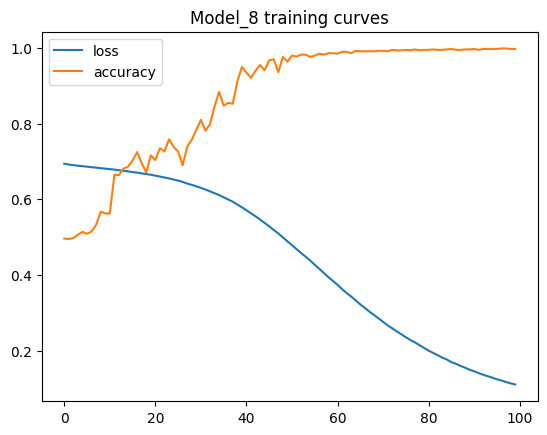

In [104]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 training curves")

In [ ]:
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer="Adam", # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"])

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history_9 = model_9.fit(X_train,
                   y_train,
                      epochs=100,
                      callbacks=[lr_scheduler])

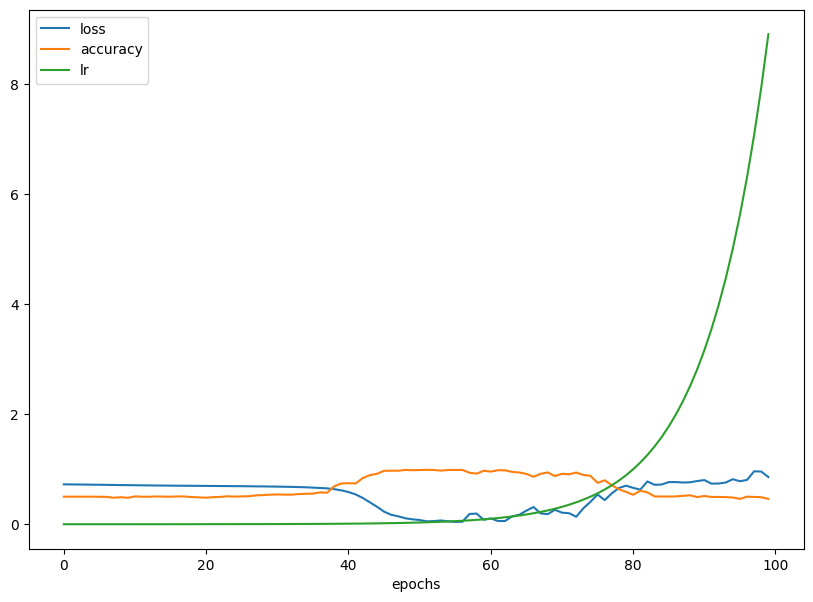

In [110]:
pd.DataFrame(history_9.history).plot(figsize=(10,7), xlabel="epochs");


Plot tthe learning rate vs the loss

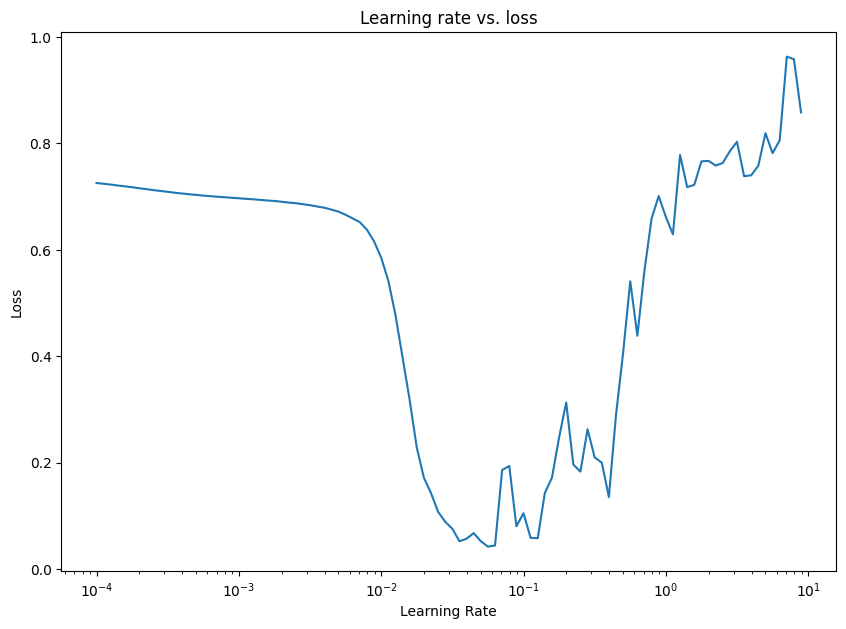

In [111]:
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [ ]:

# Set the random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history = model_10.fit(X_train, y_train, epochs=50)

In [113]:
model_10.evaluate(X_test, y_test)


7/7 [==============================] - 0s 3ms/step - loss: 0.0603 - accuracy: 0.9800


[0.060297150164842606, 0.9800000190734863]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


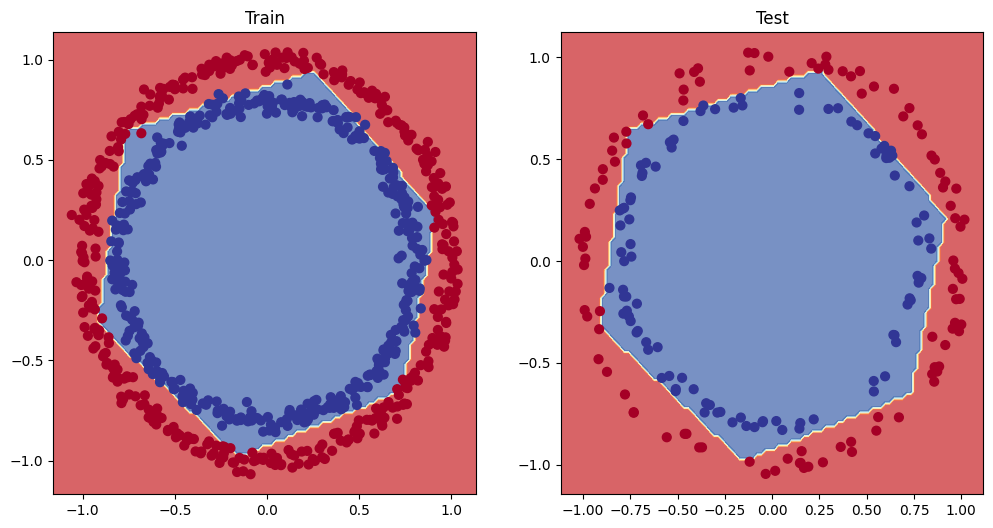

In [114]:

# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()


In [115]:

# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.0603 - accuracy: 0.9800
Model loss on test set: 0.060297150164842606
Model accuracy on test set: 98.00%


In [119]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Make predictions
y_preds = model_10.predict(X_test)

# Convert predictions to binary values
y_preds_binary = tf.round(y_preds)

# Create confusion matrix
cm = confusion_matrix(y_test, y_preds_binary)

# Calculate precision
precision = precision_score(y_test, y_preds_binary)

# Calculate recall
recall = recall_score(y_test, y_preds_binary)

# Calculate F1 score
f1 = f1_score(y_test, y_preds_binary)

print("Confusion Matrix:")
print(cm)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


7/7 [==============================] - 0s 4ms/step
Confusion Matrix:
[[99  2]
 [ 2 97]]
Precision: 0.9797979797979798
Recall: 0.9797979797979798
F1 Score: 0.9797979797979798


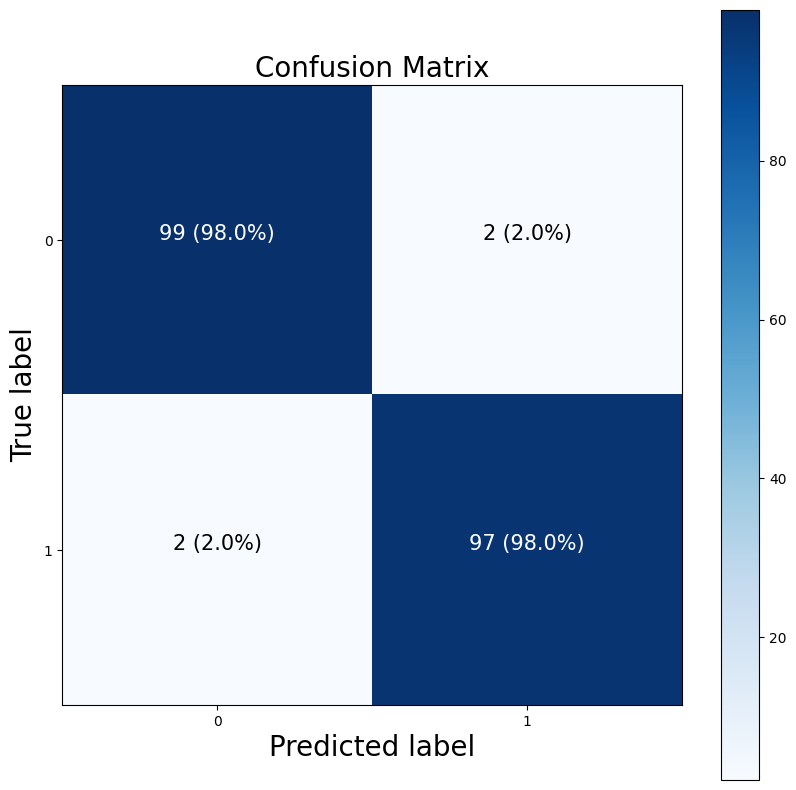

In [120]:

import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

Working on a multiclass classification model

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:


# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label: {train_labels[0]}")

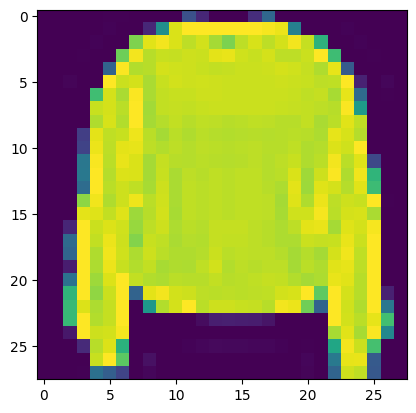

In [3]:
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [4]:

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

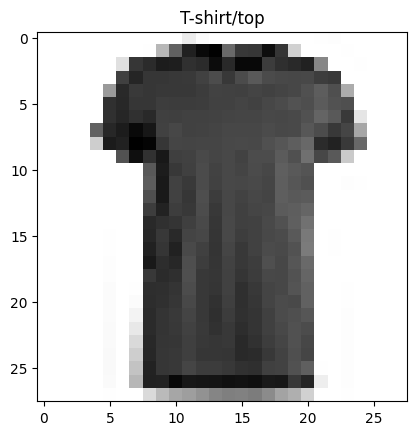

In [5]:


# Plot an example image and its label
plt.imshow(train_data[17], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_labels[17]]);

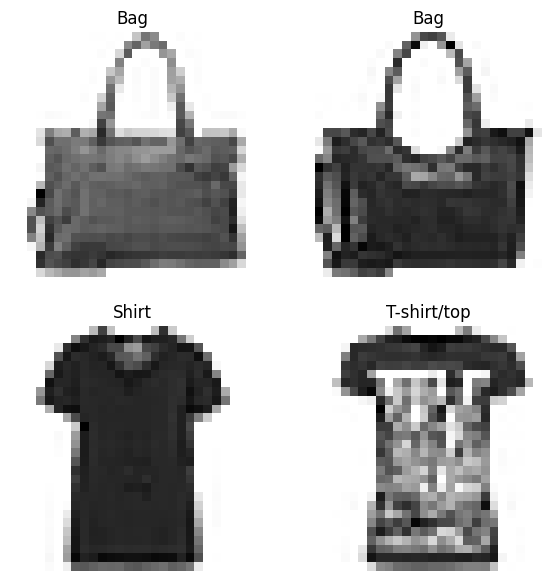

In [6]:

# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [9]:
tf.random.set_seed(42)
from tensorflow.keras.callbacks import EarlyStopping

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
early_stopping = EarlyStopping(monitor='val_loss', patience=5)  # Stop training when validation loss doesn't improve for 3 epochs


# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=50,
                                validation_data=(test_data, test_labels),
                                                                callbacks=[early_stopping])


Epoch 1/50
1875/1875 [==============================] - 11s 5ms/step - loss: 2.3339 - accuracy: 0.0975 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0984 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy

In [10]:
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])
early_stopping = EarlyStopping(monitor='val_loss', patience=5)  # Stop training when validation loss doesn't improve for 3 epochs

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history = model_12.fit(train_data,
                            train_labels,
                            epochs=50,
                            validation_data=(test_data, test_labels),
                            callbacks = early_stopping)

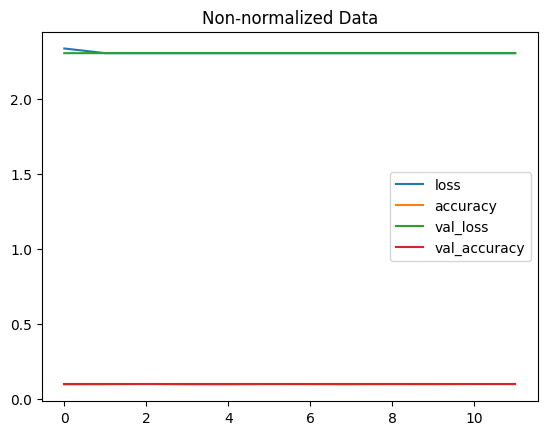

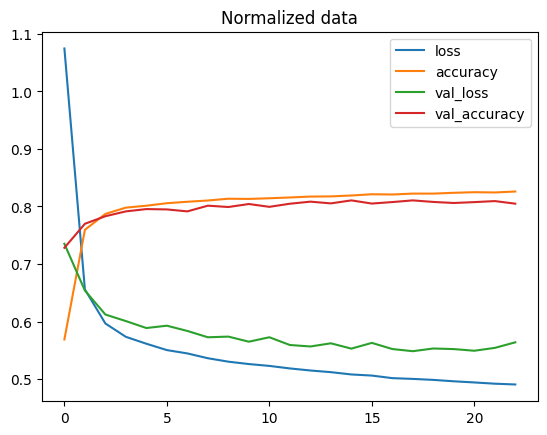

In [14]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data");


In [ ]:


# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

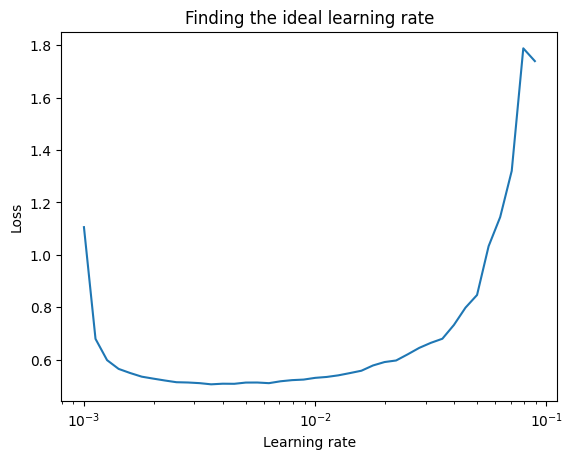

In [16]:
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");


In [100]:
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(len(class_names), activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])
early_stopping = EarlyStopping(monitor='val_loss', patience=10)  # Stop training when validation loss doesn't improve for 3 epochs

# Fit the model
history = model_14.fit(train_data,
                       train_labels,
                       epochs=100,
                       validation_data=(test_data, test_labels),
                       callbacks = [early_stopping])

Epoch 1/100
1875/1875 [==============================] - 9s 4ms/step - loss: 1.4987 - accuracy: 0.3826 - val_loss: 1.2667 - val_accuracy: 0.4640
Epoch 2/100
1875/1875 [==============================] - 8s 4ms/step - loss: 1.1376 - accuracy: 0.5316 - val_loss: 0.9882 - val_accuracy: 0.6129
Epoch 3/100
1875/1875 [==============================] - 10s 6ms/step - loss: 0.9038 - accuracy: 0.6476 - val_loss: 0.8617 - val_accuracy: 0.6834
Epoch 4/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7822 - accuracy: 0.7092 - val_loss: 0.7687 - val_accuracy: 0.7274
Epoch 5/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7271 - accuracy: 0.7325 - val_loss: 0.7443 - val_accuracy: 0.7383
Epoch 6/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7021 - accuracy: 0.7430 - val_loss: 0.7360 - val_accuracy: 0.7422
Epoch 7/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6887 - accuracy: 0.7470 - val_loss: 0.7152 - val_a

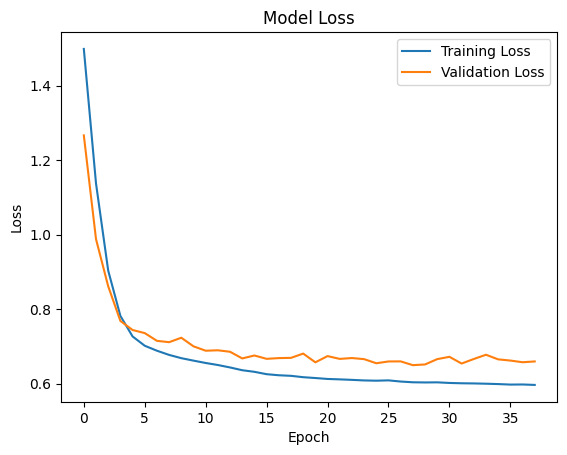

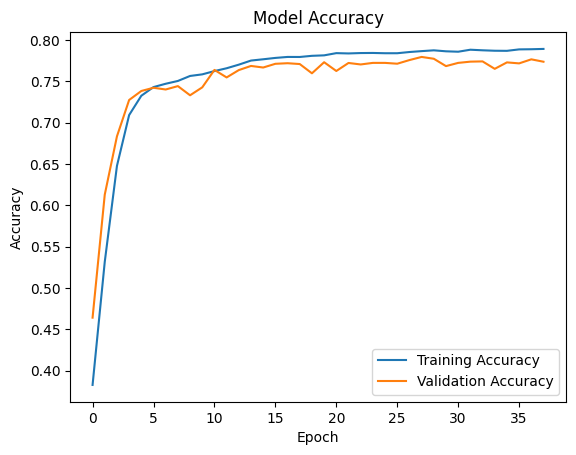

In [105]:
import matplotlib.pyplot as plt

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [106]:
# Convert predicted probabilities to class labels
y_preds_classes = np.argmax(y_preds, axis=1)

# Compute confusion matrix
cm = confusion_matrix(test_labels, y_preds_classes)

# Compute precision, recall, and F1 score
precision = precision_score(test_labels, y_preds_classes, average='macro')
recall = recall_score(test_labels, y_preds_classes, average='macro')
f1 = f1_score(test_labels, y_preds_classes, average='macro')

print("Confusion Matrix:")
print(cm)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print(classification_report(test_labels, y_preds_classes))


Confusion Matrix:
[[799   3  12  85   3   2  73   0  22   1]
 [  1 936   3  42   5   0  11   0   2   0]
 [ 25   0 705  24 127   0 103   0  16   0]
 [ 43  14  16 853  27   0  26   2  16   3]
 [  2   0 164  48 700   0  79   0   7   0]
 [  1   0   0   2   0 929   0  35   6  27]
 [219   6 169  60 106   3 403   0  34   0]
 [  0   0   0   0   0  47   0 882   0  71]
 [ 12   1  25  14   1   6   5  10 926   0]
 [  1   0   0   1   0  26   0  24   0 948]]
Precision: 0.8042792916609391
Recall: 0.8081000000000002
F1 Score: 0.80386442352962
              precision    recall  f1-score   support

           0       0.72      0.80      0.76      1000
           1       0.97      0.94      0.96      1000
           2       0.64      0.70      0.67      1000
           3       0.76      0.85      0.80      1000
           4       0.72      0.70      0.71      1000
           5       0.92      0.93      0.92      1000
           6       0.58      0.40      0.47      1000
           7       0.93      0.88 

In [107]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

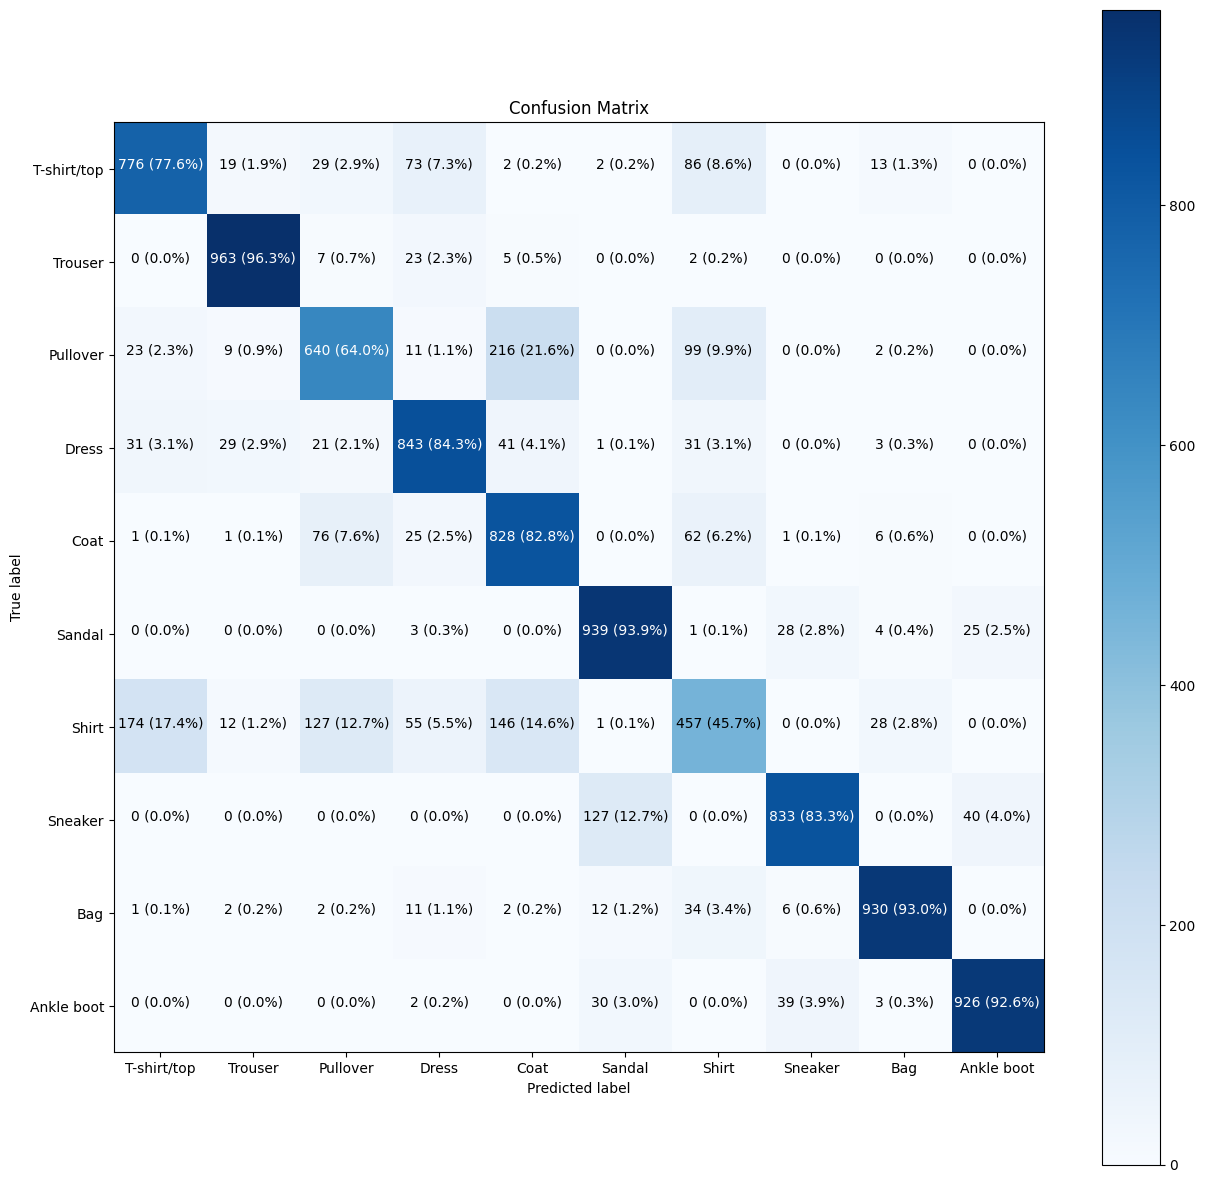

In [108]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_pred_labels,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [51]:
import torch
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import torch
from torchvision import transforms
from PIL import Image
import ipywidgets as widgets
from IPython.display import display
from io import BytesIO

class ImagePredictor:
    def __init__(self, model, custom_labels):
        self.model = model
        self.custom_labels = custom_labels
        self.preprocess = transforms.Compose([
            transforms.Resize(28),

            transforms.ToTensor(),
        ])

    def predict_image(self, upload_widget):
        # Get the uploaded image
        uploaded_image = upload_widget.data[-1]

        # Display the uploaded image
        display(Image.open(BytesIO(uploaded_image)))

        # Preprocess the image
        input_image = Image.open(BytesIO(uploaded_image))
        input_tensor = self.preprocess(input_image)
        input_batch = input_tensor.unsqueeze(dim=0)  # Add a batch dimension

        # Move input tensor to CPU
        input_batch = input_batch.to('cpu')

        # Perform inference
        with torch.no_grad():
            output = self.model(input_batch)

        # Get the predicted label index and confidence
        _, predicted_idx = torch.max(output, 1)
        confidence = torch.nn.functional.softmax(output[0], dim=0)[predicted_idx.item()].item() * 100

        # Map the predicted index to a custom label or provide a default label
        if predicted_idx.item() < len(self.custom_labels):
            predicted_label = self.custom_labels[predicted_idx.item()]
        else:
            predicted_label = f"Unknown Class {predicted_idx.item()}"

        # Display the predicted label and confidence
        print(f"Predicted label: {predicted_label} with confidence: {confidence:.2f}%")

def create_upload_button(image_predictor):
    # Create an upload button
    upload_btn = widgets.FileUpload()

    # Define a function to handle file upload and prediction
    def handle_upload(change):
        if upload_btn.value:
            # Call predict_image method of ImagePredictor class
            image_predictor.predict_image(upload_btn)
        else:
            print("Please upload an image.")

    # Attach the handle_upload function to observe changes in the upload button
    upload_btn.observe(handle_upload, names='value')

    # Display the upload button
    display(upload_btn)

# Example usage
# Assuming `model_14` and `class_names` are defined somewhere
# image_predictor = ImagePredictor(model_14, class_names)
# create_upload_button(image_predictor)


In [53]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
image_predictor = ImagePredictor(model_14, class_names)
create_upload_button(image_predictor)

In [55]:
model_14.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_30 (Dense)            (None, 4)                 3140      
                                                                 
 dropout_3 (Dropout)         (None, 4)                 0         
                                                                 
 dense_31 (Dense)            (None, 4)                 20        
                                                                 
 dropout_4 (Dropout)         (None, 4)                 0         
                                                                 
 dense_32 (Dense)            (None, 10)                50        
                                                                 
 dense_33 (Dense)            (None, 10)               